In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [60]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [61]:
df.head()
# print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
 # tells if there any missing value(null values) or not
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [63]:
df.duplicated().sum()

0

In [64]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [65]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [66]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [67]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [69]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [70]:
df = df.replace({True:1 , False:0})

/tmp/ipykernel_33/3779320485.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True:1 , False:0})


In [71]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [72]:
X = df.drop(columns = ['Exited'])
Y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [73]:
X_train.shape

(8000, 11)

In [74]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [77]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [78]:
model = Sequential()

model.add(Dense(3, activation = 'sigmoid', input_dim = 11))
model.add(Dense(1, activation = 'sigmoid'))

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [93]:
history = model.fit(X_train_scaled, Y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 1.1438 - accuracy: 0.2041 - val_loss: 1.0080 - val_accuracy: 0.2081
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.8902 - accuracy: 0.2506 - val_loss: 0.8036 - val_accuracy: 0.3300
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.7295 - accuracy: 0.4672 - val_loss: 0.6768 - val_accuracy: 0.5925
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7028 - val_loss: 0.5982 - val_accuracy: 0.7781
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7939 - val_loss: 0.5488 - val_accuracy: 0.7981
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7972 - val_loss: 0.5164 - val_accuracy: 0.7975
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5031 - accuracy: 0.7972 - val_loss: 0.4955 - val_accuracy: 0.7975
Epoch 

In [94]:
model.layers[0].get_weights()

[array([[ 0.10203893, -0.08654393, -0.0624023 ],
        [-3.610574  ,  0.26181573,  0.00810646],
        [-0.03724131, -0.15843311, -0.12268692],
        [-0.09921373,  0.7194953 , -0.5375634 ],
        [-0.4472173 ,  0.63580143, -2.3213096 ],
        [-0.03531504, -0.21415058, -0.02314574],
        [-0.24902898, -1.5848502 , -0.9128384 ],
        [ 0.13456975,  0.08380251,  0.19923295],
        [-0.23543617,  0.82200396,  0.58634126],
        [-0.03827391,  0.10104965,  0.05951881],
        [ 0.07671911, -0.8966308 , -0.2150624 ]], dtype=float32),
 array([ 0.97871304, -0.8081821 , -1.5484167 ], dtype=float32)]

In [95]:
Y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [96]:
Y_log

array([[0.1994356 ],
       [0.11532466],
       [0.14336737],
       ...,
       [0.03873893],
       [0.07821132],
       [0.38597462]], dtype=float32)

In [97]:
Y_pred = np.where(y_log > 0.5, 1, 0)

In [98]:
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.797

In [100]:
import matplotlib.pyplot as plt

In [101]:
history.history

{'loss': [1.1437621116638184,
  0.890163242816925,
  0.7295185327529907,
  0.6306360960006714,
  0.5689473152160645,
  0.5291845202445984,
  0.5031380653381348,
  0.48581835627555847,
  0.47391101717948914,
  0.4652038514614105,
  0.458394318819046,
  0.4526294469833374,
  0.4474671483039856,
  0.4427637755870819,
  0.43854671716690063,
  0.43486517667770386,
  0.43164193630218506,
  0.4289155900478363,
  0.42662060260772705,
  0.42462658882141113,
  0.42290839552879333,
  0.4213500916957855,
  0.4200214743614197,
  0.4187588095664978,
  0.4175454378128052,
  0.4164494276046753,
  0.4153803288936615,
  0.41441455483436584,
  0.4134666919708252,
  0.41253548860549927,
  0.41168999671936035,
  0.41073986887931824,
  0.40984469652175903,
  0.40895920991897583,
  0.407924622297287,
  0.40696993470191956,
  0.4058389961719513,
  0.4047059118747711,
  0.4035978317260742,
  0.4024340510368347,
  0.40127700567245483,
  0.40008971095085144,
  0.3989407420158386,
  0.39783358573913574,
  0.39679

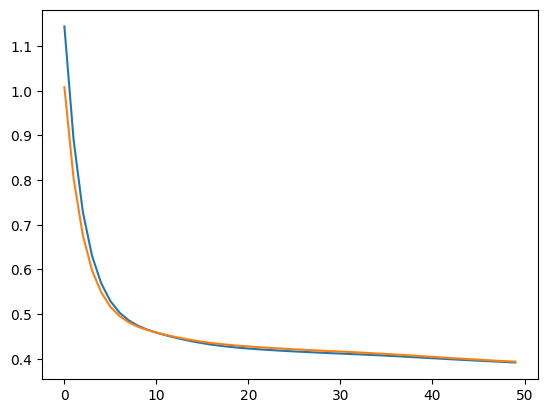

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

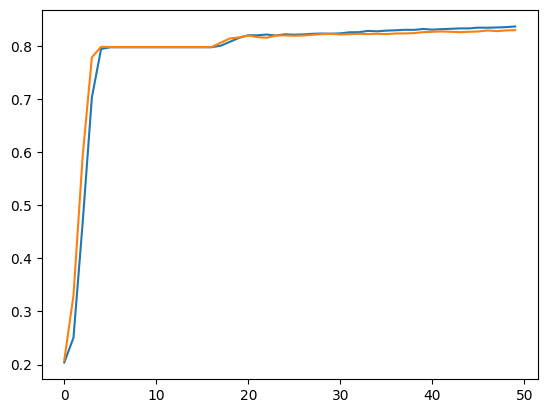

In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])